In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [28]:
def read_dataset():
    df=pd.read_csv('data/Sonar.csv')
    #print(len(df.columns))
    X=df[df.columns[0:60]].values
    y=df[df.columns[60]]
    #print(X)
    #print(y)
    encoder=LabelEncoder()
    encoder.fit(y)
    y=encoder.transform(y)
    Y=one_hot_encode(y)
    print(X.shape)
    return (X,Y)

In [33]:
def one_hot_encode(labels):
    n_labels=len(labels)
    n_unique_labels=len(np.unique(labels))
    one_hot_encode=np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels]=1
    return one_hot_encode

In [35]:
X,Y=read_dataset()

(208, 60)


In [36]:
X,Y=shuffle(X,Y,random_state=1)

In [37]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.20,random_state=415)

In [38]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(166, 60)
(42, 60)
(166, 2)
(42, 2)


In [40]:
learning_rate=0.30
epochs=1000
cost_history=np.empty(shape=[1],dtype=float)
n_dim=X.shape[1]
print("n_dim",n_dim)
n_Class=2

('n_dim', 60)


In [41]:
n_hidden_1=60
n_hidden_2=60
n_hidden_3=60
n_hidden_4=60

In [54]:
x=tf.placeholder(tf.float32,[None,n_dim])
W=tf.Variable(tf.zeros([n_dim,n_Class]))
b=tf.Variable(tf.zeros([n_Class]))
y_=tf.placeholder(tf.float32,[None,n_Class])

In [55]:
def multilayer_perceptron(x,W,b):
    layer_1=tf.add(tf.matmul(x,W['h1']),b['b1'])
    layer_1=tf.nn.sigmoid(layer_1)
    
    layer_2=tf.add(tf.matmul(layer_1,W['h2']),b['b2'])
    layer_2=tf.nn.sigmoid(layer_2)
    
    layer_3=tf.add(tf.matmul(layer_2,W['h3']),b['b3'])
    layer_3=tf.nn.sigmoid(layer_3)
    
    layer_4=tf.add(tf.matmul(layer_3,W['h4']),b['b4'])
    layer_4=tf.nn.relu(layer_1)
    
    out_layer=tf.add(tf.matmul(layer_4,W['out']),b['out'])
    return out_layer

In [59]:
weights={
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_Class]))
}

biases={
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_Class]))
}

In [60]:
init=tf.global_variables_initializer()
saver=tf.train.Saver()

In [62]:
y=multilayer_perceptron(x,weights,biases)

In [63]:
cost_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_))

In [64]:
training_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [65]:
sess=tf.Session()
sess.run(init)

In [66]:
mse_history=[]
accuracy_history=[]
for epoch in range(epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost=sess.run(cost_function,feed_dict={x:train_x,y_:train_y})
    cost_history=np.append(cost_history,cost)
    correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    pred_y=sess.run(y,feed_dict={x:test_x})
    mse=tf.reduce_mean(tf.square(pred_y-test_y))
    mse_=sess.run(mse)
    mse_history.append(mse_)
    accuracy=(sess.run(accuracy,feed_dict={x:train_x,y_:train_y}))
    accuracy_history.append(accuracy)
    
    print('epoch : ', epoch, ' - ','cost : ', cost, " - MSE: ",mse_, "- Train Accuracy: ",accuracy)

('epoch : ', 0, ' - ', 'cost : ', 1.9599152, ' - MSE: ', 13.746136955538244, '- Train Accuracy: ', 0.44578314)
('epoch : ', 1, ' - ', 'cost : ', 2.5457776, ' - MSE: ', 20.451132120196217, '- Train Accuracy: ', 0.5481928)
('epoch : ', 2, ' - ', 'cost : ', 1.7639252, ' - MSE: ', 13.208282801735855, '- Train Accuracy: ', 0.45180723)
('epoch : ', 3, ' - ', 'cost : ', 2.4174213, ' - MSE: ', 19.604920712113387, '- Train Accuracy: ', 0.5481928)
('epoch : ', 4, ' - ', 'cost : ', 1.722033, ' - MSE: ', 13.098100629365852, '- Train Accuracy: ', 0.44578314)
('epoch : ', 5, ' - ', 'cost : ', 2.3781137, ' - MSE: ', 19.364783343405243, '- Train Accuracy: ', 0.5481928)
('epoch : ', 6, ' - ', 'cost : ', 1.6204045, ' - MSE: ', 12.833140711487321, '- Train Accuracy: ', 0.44578314)
('epoch : ', 7, ' - ', 'cost : ', 2.2913406, ' - MSE: ', 18.824094574706788, '- Train Accuracy: ', 0.5481928)
('epoch : ', 8, ' - ', 'cost : ', 1.5609359, ' - MSE: ', 12.683395361504468, '- Train Accuracy: ', 0.45180723)
('epoc

('epoch : ', 74, ' - ', 'cost : ', 0.55161393, ' - MSE: ', 10.878881134916842, '- Train Accuracy: ', 0.6987952)
('epoch : ', 75, ' - ', 'cost : ', 0.57385886, ' - MSE: ', 11.274605785146635, '- Train Accuracy: ', 0.73493975)
('epoch : ', 76, ' - ', 'cost : ', 0.53932339, ' - MSE: ', 10.875075972245671, '- Train Accuracy: ', 0.70481926)
('epoch : ', 77, ' - ', 'cost : ', 0.55899256, ' - MSE: ', 11.246571868042381, '- Train Accuracy: ', 0.73493975)
('epoch : ', 78, ' - ', 'cost : ', 0.52774197, ' - MSE: ', 10.872656464262118, '- Train Accuracy: ', 0.70481926)
('epoch : ', 79, ' - ', 'cost : ', 0.54512936, ' - MSE: ', 11.222149001290985, '- Train Accuracy: ', 0.74096388)
('epoch : ', 80, ' - ', 'cost : ', 0.51682353, ' - MSE: ', 10.871529906719275, '- Train Accuracy: ', 0.70481926)
('epoch : ', 81, ' - ', 'cost : ', 0.53218967, ' - MSE: ', 11.201002997618634, '- Train Accuracy: ', 0.74096388)
('epoch : ', 82, ' - ', 'cost : ', 0.50652498, ' - MSE: ', 10.871617492769071, '- Train Accuracy:

('epoch : ', 148, ' - ', 'cost : ', 0.34773141, ' - MSE: ', 11.221030913886663, '- Train Accuracy: ', 0.86746991)
('epoch : ', 149, ' - ', 'cost : ', 0.34718978, ' - MSE: ', 11.301017520933943, '- Train Accuracy: ', 0.85542166)
('epoch : ', 150, ' - ', 'cost : ', 0.34562632, ' - MSE: ', 11.236161461754778, '- Train Accuracy: ', 0.87349397)
('epoch : ', 151, ' - ', 'cost : ', 0.34506029, ' - MSE: ', 11.313093743158149, '- Train Accuracy: ', 0.86144578)
('epoch : ', 152, ' - ', 'cost : ', 0.34359726, ' - MSE: ', 11.251364393251292, '- Train Accuracy: ', 0.87349397)
('epoch : ', 153, ' - ', 'cost : ', 0.34301162, ' - MSE: ', 11.325331385474549, '- Train Accuracy: ', 0.86746991)
('epoch : ', 154, ' - ', 'cost : ', 0.34164047, ' - MSE: ', 11.266629071572027, '- Train Accuracy: ', 0.87349397)
('epoch : ', 155, ' - ', 'cost : ', 0.34103972, ' - MSE: ', 11.337714621013854, '- Train Accuracy: ', 0.87951809)
('epoch : ', 156, ' - ', 'cost : ', 0.3397527, ' - MSE: ', 11.281949085910645, '- Train 

('epoch : ', 220, ' - ', 'cost : ', 0.30072904, ' - MSE: ', 11.759259261330209, '- Train Accuracy: ', 0.89759034)
('epoch : ', 221, ' - ', 'cost : ', 0.30028903, ' - MSE: ', 11.774804151630638, '- Train Accuracy: ', 0.89156628)
('epoch : ', 222, ' - ', 'cost : ', 0.29984981, ' - MSE: ', 11.773027911857341, '- Train Accuracy: ', 0.89759034)
('epoch : ', 223, ' - ', 'cost : ', 0.29941404, ' - MSE: ', 11.787883342538317, '- Train Accuracy: ', 0.89156628)
('epoch : ', 224, ' - ', 'cost : ', 0.29897916, ' - MSE: ', 11.786715578056498, '- Train Accuracy: ', 0.89759034)
('epoch : ', 225, ' - ', 'cost : ', 0.2985473, ' - MSE: ', 11.800923248592033, '- Train Accuracy: ', 0.89156628)
('epoch : ', 226, ' - ', 'cost : ', 0.29811653, ' - MSE: ', 11.800322599946572, '- Train Accuracy: ', 0.89759034)
('epoch : ', 227, ' - ', 'cost : ', 0.29768848, ' - MSE: ', 11.813924620061242, '- Train Accuracy: ', 0.89156628)
('epoch : ', 228, ' - ', 'cost : ', 0.2972616, ' - MSE: ', 11.813852414992558, '- Train A

('epoch : ', 293, ' - ', 'cost : ', 0.27228865, ' - MSE: ', 12.221718215105673, '- Train Accuracy: ', 0.90361446)
('epoch : ', 294, ' - ', 'cost : ', 0.27193686, ' - MSE: ', 12.227318072267494, '- Train Accuracy: ', 0.90361446)
('epoch : ', 295, ' - ', 'cost : ', 0.27158579, ' - MSE: ', 12.233509045915747, '- Train Accuracy: ', 0.90361446)
('epoch : ', 296, ' - ', 'cost : ', 0.27123553, ' - MSE: ', 12.23912184156845, '- Train Accuracy: ', 0.90361446)
('epoch : ', 297, ' - ', 'cost : ', 0.27088606, ' - MSE: ', 12.245268249151557, '- Train Accuracy: ', 0.90361446)
('epoch : ', 298, ' - ', 'cost : ', 0.27053741, ' - MSE: ', 12.250894856147577, '- Train Accuracy: ', 0.90361446)
('epoch : ', 299, ' - ', 'cost : ', 0.27018952, ' - MSE: ', 12.257000684395109, '- Train Accuracy: ', 0.90361446)
('epoch : ', 300, ' - ', 'cost : ', 0.26984248, ' - MSE: ', 12.262637471247507, '- Train Accuracy: ', 0.90361446)
('epoch : ', 301, ' - ', 'cost : ', 0.26949614, ' - MSE: ', 12.268704585417245, '- Train 

('epoch : ', 365, ' - ', 'cost : ', 0.24875598, ' - MSE: ', 12.62967181769411, '- Train Accuracy: ', 0.90963858)
('epoch : ', 366, ' - ', 'cost : ', 0.24845169, ' - MSE: ', 12.635106109557926, '- Train Accuracy: ', 0.90963858)
('epoch : ', 367, ' - ', 'cost : ', 0.24814793, ' - MSE: ', 12.640546673377184, '- Train Accuracy: ', 0.91566265)
('epoch : ', 368, ' - ', 'cost : ', 0.24784477, ' - MSE: ', 12.645967933079042, '- Train Accuracy: ', 0.91566265)
('epoch : ', 369, ' - ', 'cost : ', 0.24754211, ' - MSE: ', 12.651393004431899, '- Train Accuracy: ', 0.91566265)
('epoch : ', 370, ' - ', 'cost : ', 0.24723998, ' - MSE: ', 12.656802137531415, '- Train Accuracy: ', 0.91566265)
('epoch : ', 371, ' - ', 'cost : ', 0.24693838, ' - MSE: ', 12.662214249772783, '- Train Accuracy: ', 0.91566265)
('epoch : ', 372, ' - ', 'cost : ', 0.24663737, ' - MSE: ', 12.667614409739894, '- Train Accuracy: ', 0.91566265)
('epoch : ', 373, ' - ', 'cost : ', 0.24633691, ' - MSE: ', 12.673014132435215, '- Train 

('epoch : ', 437, ' - ', 'cost : ', 0.22813353, ' - MSE: ', 13.00354846678699, '- Train Accuracy: ', 0.92168677)
('epoch : ', 438, ' - ', 'cost : ', 0.22786416, ' - MSE: ', 13.008447431511462, '- Train Accuracy: ', 0.92168677)
('epoch : ', 439, ' - ', 'cost : ', 0.22759525, ' - MSE: ', 13.013339660550008, '- Train Accuracy: ', 0.92168677)
('epoch : ', 440, ' - ', 'cost : ', 0.22732684, ' - MSE: ', 13.018221631566078, '- Train Accuracy: ', 0.92168677)
('epoch : ', 441, ' - ', 'cost : ', 0.22705875, ' - MSE: ', 13.023093507733378, '- Train Accuracy: ', 0.92168677)
('epoch : ', 442, ' - ', 'cost : ', 0.22679117, ' - MSE: ', 13.02795716738145, '- Train Accuracy: ', 0.92168677)
('epoch : ', 443, ' - ', 'cost : ', 0.22652407, ' - MSE: ', 13.03280986904562, '- Train Accuracy: ', 0.92168677)
('epoch : ', 444, ' - ', 'cost : ', 0.22625728, ' - MSE: ', 13.037653637735682, '- Train Accuracy: ', 0.92168677)
('epoch : ', 445, ' - ', 'cost : ', 0.22599106, ' - MSE: ', 13.042487929928379, '- Train Ac

('epoch : ', 510, ' - ', 'cost : ', 0.20957218, ' - MSE: ', 13.33275249311184, '- Train Accuracy: ', 0.93975902)
('epoch : ', 511, ' - ', 'cost : ', 0.20933269, ' - MSE: ', 13.336806695854158, '- Train Accuracy: ', 0.93975902)
('epoch : ', 512, ' - ', 'cost : ', 0.2090936, ' - MSE: ', 13.34084892817847, '- Train Accuracy: ', 0.93975902)
('epoch : ', 513, ' - ', 'cost : ', 0.20885481, ' - MSE: ', 13.344877217610955, '- Train Accuracy: ', 0.93975902)
('epoch : ', 514, ' - ', 'cost : ', 0.20861644, ' - MSE: ', 13.348892642810494, '- Train Accuracy: ', 0.93975902)
('epoch : ', 515, ' - ', 'cost : ', 0.20837846, ' - MSE: ', 13.352893578511466, '- Train Accuracy: ', 0.93975902)
('epoch : ', 516, ' - ', 'cost : ', 0.20814085, ' - MSE: ', 13.35687993643354, '- Train Accuracy: ', 0.93975902)
('epoch : ', 517, ' - ', 'cost : ', 0.20790358, ' - MSE: ', 13.360854611907996, '- Train Accuracy: ', 0.93975902)
('epoch : ', 518, ' - ', 'cost : ', 0.20766672, ' - MSE: ', 13.364815447414903, '- Train Acc

('epoch : ', 583, ' - ', 'cost : ', 0.19303067, ' - MSE: ', 13.591862140892882, '- Train Accuracy: ', 0.9518072)
('epoch : ', 584, ' - ', 'cost : ', 0.19281659, ' - MSE: ', 13.594884760844256, '- Train Accuracy: ', 0.9518072)
('epoch : ', 585, ' - ', 'cost : ', 0.1926028, ' - MSE: ', 13.597894206122337, '- Train Accuracy: ', 0.9518072)
('epoch : ', 586, ' - ', 'cost : ', 0.19238935, ' - MSE: ', 13.600888330576796, '- Train Accuracy: ', 0.9518072)
('epoch : ', 587, ' - ', 'cost : ', 0.19217619, ' - MSE: ', 13.603870386963255, '- Train Accuracy: ', 0.9518072)
('epoch : ', 588, ' - ', 'cost : ', 0.1919634, ' - MSE: ', 13.606836145471194, '- Train Accuracy: ', 0.9518072)
('epoch : ', 589, ' - ', 'cost : ', 0.1917509, ' - MSE: ', 13.609787831821128, '- Train Accuracy: ', 0.9518072)
('epoch : ', 590, ' - ', 'cost : ', 0.19153869, ' - MSE: ', 13.612726927855793, '- Train Accuracy: ', 0.9518072)
('epoch : ', 591, ' - ', 'cost : ', 0.19132678, ' - MSE: ', 13.615652610027837, '- Train Accuracy: 

('epoch : ', 656, ' - ', 'cost : ', 0.17819086, ' - MSE: ', 13.777512551782442, '- Train Accuracy: ', 0.95783132)
('epoch : ', 657, ' - ', 'cost : ', 0.17799802, ' - MSE: ', 13.779598608764962, '- Train Accuracy: ', 0.95783132)
('epoch : ', 658, ' - ', 'cost : ', 0.1778055, ' - MSE: ', 13.781670715635672, '- Train Accuracy: ', 0.95783132)
('epoch : ', 659, ' - ', 'cost : ', 0.17761327, ' - MSE: ', 13.783733575615424, '- Train Accuracy: ', 0.95783132)
('epoch : ', 660, ' - ', 'cost : ', 0.17742124, ' - MSE: ', 13.785785359824043, '- Train Accuracy: ', 0.95783132)
('epoch : ', 661, ' - ', 'cost : ', 0.17722954, ' - MSE: ', 13.7878259120727, '- Train Accuracy: ', 0.95783132)
('epoch : ', 662, ' - ', 'cost : ', 0.17703807, ' - MSE: ', 13.789853748286358, '- Train Accuracy: ', 0.95783132)
('epoch : ', 663, ' - ', 'cost : ', 0.17684688, ' - MSE: ', 13.791871521278582, '- Train Accuracy: ', 0.95783132)
('epoch : ', 664, ' - ', 'cost : ', 0.17665595, ' - MSE: ', 13.793878158717394, '- Train Ac

('epoch : ', 729, ' - ', 'cost : ', 0.16478816, ' - MSE: ', 13.903263358495369, '- Train Accuracy: ', 0.97590363)
('epoch : ', 730, ' - ', 'cost : ', 0.16461357, ' - MSE: ', 13.904660611783465, '- Train Accuracy: ', 0.97590363)
('epoch : ', 731, ' - ', 'cost : ', 0.16443925, ' - MSE: ', 13.906050983636657, '- Train Accuracy: ', 0.97590363)
('epoch : ', 732, ' - ', 'cost : ', 0.16426513, ' - MSE: ', 13.907432955868936, '- Train Accuracy: ', 0.97590363)
('epoch : ', 733, ' - ', 'cost : ', 0.16409129, ' - MSE: ', 13.908807402826662, '- Train Accuracy: ', 0.97590363)
('epoch : ', 734, ' - ', 'cost : ', 0.16391759, ' - MSE: ', 13.910174811107558, '- Train Accuracy: ', 0.97590363)
('epoch : ', 735, ' - ', 'cost : ', 0.16374421, ' - MSE: ', 13.91153479601285, '- Train Accuracy: ', 0.97590363)
('epoch : ', 736, ' - ', 'cost : ', 0.16357104, ' - MSE: ', 13.912886726752488, '- Train Accuracy: ', 0.97590363)
('epoch : ', 737, ' - ', 'cost : ', 0.16339809, ' - MSE: ', 13.914232421734354, '- Train 

('epoch : ', 801, ' - ', 'cost : ', 0.15279131, ' - MSE: ', 13.987513887624416, '- Train Accuracy: ', 0.98192769)
('epoch : ', 802, ' - ', 'cost : ', 0.15263253, ' - MSE: ', 13.988491760312266, '- Train Accuracy: ', 0.98192769)
('epoch : ', 803, ' - ', 'cost : ', 0.15247397, ' - MSE: ', 13.989464241698922, '- Train Accuracy: ', 0.98192769)
('epoch : ', 804, ' - ', 'cost : ', 0.15231562, ' - MSE: ', 13.990432662184947, '- Train Accuracy: ', 0.98192769)
('epoch : ', 805, ' - ', 'cost : ', 0.15215746, ' - MSE: ', 13.991397889976881, '- Train Accuracy: ', 0.98192769)
('epoch : ', 806, ' - ', 'cost : ', 0.15199955, ' - MSE: ', 13.992357292900564, '- Train Accuracy: ', 0.98192769)
('epoch : ', 807, ' - ', 'cost : ', 0.15184176, ' - MSE: ', 13.993312650996737, '- Train Accuracy: ', 0.98192769)
('epoch : ', 808, ' - ', 'cost : ', 0.15168428, ' - MSE: ', 13.994265241720381, '- Train Accuracy: ', 0.98192769)
('epoch : ', 809, ' - ', 'cost : ', 0.15152697, ' - MSE: ', 13.995213225215331, '- Train

('epoch : ', 873, ' - ', 'cost : ', 0.14187025, ' - MSE: ', 14.049157785463541, '- Train Accuracy: ', 0.98192769)
('epoch : ', 874, ' - ', 'cost : ', 0.14172558, ' - MSE: ', 14.049919057275877, '- Train Accuracy: ', 0.98192769)
('epoch : ', 875, ' - ', 'cost : ', 0.14158107, ' - MSE: ', 14.050678510915072, '- Train Accuracy: ', 0.98192769)
('epoch : ', 876, ' - ', 'cost : ', 0.14143679, ' - MSE: ', 14.051434923324791, '- Train Accuracy: ', 0.98192769)
('epoch : ', 877, ' - ', 'cost : ', 0.14129271, ' - MSE: ', 14.052191416339088, '- Train Accuracy: ', 0.98192769)
('epoch : ', 878, ' - ', 'cost : ', 0.14114879, ' - MSE: ', 14.052943674425624, '- Train Accuracy: ', 0.98192769)
('epoch : ', 879, ' - ', 'cost : ', 0.14100502, ' - MSE: ', 14.053696991101328, '- Train Accuracy: ', 0.98192769)
('epoch : ', 880, ' - ', 'cost : ', 0.14086147, ' - MSE: ', 14.054446113367492, '- Train Accuracy: ', 0.98192769)
('epoch : ', 881, ' - ', 'cost : ', 0.14071809, ' - MSE: ', 14.055191833334854, '- Train

('epoch : ', 945, ' - ', 'cost : ', 0.13191094, ' - MSE: ', 14.100467479018826, '- Train Accuracy: ', 0.98795182)
('epoch : ', 946, ' - ', 'cost : ', 0.1317789, ' - MSE: ', 14.101147816180813, '- Train Accuracy: ', 0.98795182)
('epoch : ', 947, ' - ', 'cost : ', 0.13164704, ' - MSE: ', 14.101828579799527, '- Train Accuracy: ', 0.98795182)
('epoch : ', 948, ' - ', 'cost : ', 0.13151532, ' - MSE: ', 14.102508027730483, '- Train Accuracy: ', 0.98795182)
('epoch : ', 949, ' - ', 'cost : ', 0.13138378, ' - MSE: ', 14.103188069991837, '- Train Accuracy: ', 0.98795182)
('epoch : ', 950, ' - ', 'cost : ', 0.13125239, ' - MSE: ', 14.103867050266041, '- Train Accuracy: ', 0.98795182)
('epoch : ', 951, ' - ', 'cost : ', 0.13112117, ' - MSE: ', 14.104547133264177, '- Train Accuracy: ', 0.98795182)
('epoch : ', 952, ' - ', 'cost : ', 0.13099013, ' - MSE: ', 14.105224950153637, '- Train Accuracy: ', 0.98795182)
('epoch : ', 953, ' - ', 'cost : ', 0.13085926, ' - MSE: ', 14.10590203702216, '- Train A

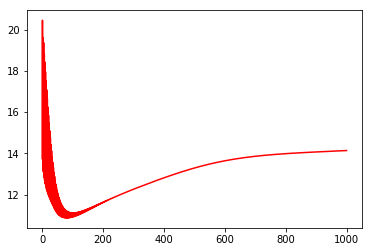

In [67]:
plt.plot(mse_history,'r')
plt.show()

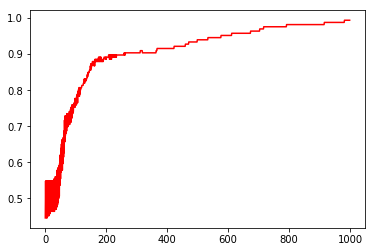

In [68]:
plt.plot(accuracy_history,'r')
plt.show()

In [72]:
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Test Accuracy: ", (sess.run(accuracy,feed_dict={x:test_x,y_:test_y})))

('Test Accuracy: ', 0.80952382)


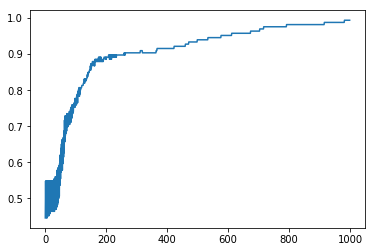

In [69]:
plt.plot(accuracy_history)
plt.show()

In [70]:
pred_y=sess.run(y,feed_dict={x:test_x})
mse=tf.reduce_mean(tf.square(pred_y-test_y))
print("MSE: %.4f" %sess.run(mse))

MSE: 14.1369
